# Foundation Exploratory Analysis

## Important Points to Hit:
 - **Brand Overview**
     -  **Number of Reviews by Brand**
     -  **Average Rating by Brand**
     -  **Average Price by Brand**
     -  **Bayesian Adjustment of Rating by Brand**
     -  **Average Rating by Average Price**
 - Product Overview
     -  Number of Reviews by Product
     -  Average Rating by Product
 - Utlization of Customer Information
     -  **How Do Average Ratings and Price of Product Relate? **
         -  **ANOVA**
     -  **How Does Age Group Affect Price of Product? **
         -  **ANOVA**
     -  **What Brands Offer Greatest Skin Shade Diversity by Reviews? (Hiroka)**
     -  **What Foundations Offer Greatest Skin Shade Diversity by Reviews? (Hiroka)**
     -  What Brands Offer Greatest Skin Type Diversity by Reviews? (Hiroka)
     -  What Foundations Offer Greatest Skin Type Diversity by Reviews? (Hiroka)
     -  **Age by Skin Concerns (Hiroka)**
     -  **Correlation Matrix of Proportions**
         -  Skin Type by Skin Concern
     -  When Do Customers Review the Most?

In [42]:
#Packages
import numpy as np
import pandas as pd
from collections import Counter
from plotnine import *
import plotnine as p9
import os
import warnings
import random
from pandas.api.types import CategoricalDtype
from scipy.stats import chisquare
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import math
import seaborn as sns
from PIL import Image
from matplotlib import pyplot as plt
from matplotlib.image import BboxImage
from matplotlib.transforms import Bbox, TransformedBbox
import requests
import io

In [43]:
#set working directory
os.chdir('/Users/sangeetharamamurthy/Desktop/SephoraFoundationAnalysis/Datasets')
#read in review data
review_db = pd.read_csv('sephora_review_db.csv')
#set working directory
os.chdir('/Users/sangeetharamamurthy/Desktop/SephoraFoundationAnalysis/ExploratoryAnalysis')

In [44]:
#remove products we don't want (products that are not foundations)
bad_names = ['Capture Dreamskin Fresh & Perfect Cushion Broad Spectrum SPF 50 Refill', 
             'Double Wear Stay-In-Place Foundation Pump',
             'Chromatic Mix – Oil Base',
             'Teint Idole Ultra Longwear Cushion Foundation SPF 50 Refill',
             'Chromatic Mix – Water Base',
             'Liquid Foundation Pump']

df = review_db[~(review_db['name'].isin(bad_names))]

In [45]:
df.head()

,brand,name,brand_id,brand_image_url,product_id,product_image_url,rating,skin_type,eye_color,skin_concerns,...,skin_tone,age,beauty_insider,user_name,price,recommended,first_submission_date,last_submission_date,location,description
0,FENTY BEAUTY by Rihanna,Pro Filt'r Soft Matte Longwear Foundation,6200,/contentimages/brands/fentybeauty/logo.jpg,P87985432,https://www.sephora.com/productimages/sku/s192...,5,combination,brown,darkCircles,...,dark,NaN,NaN,BrowniexVixen,$34.00,True,2018-02-05T21:40:40.000+00:00,2018-12-02T23:50:37.000+00:00,NaN,"What it is: A soft-matte, long-wear foundation..."
1,FENTY BEAUTY by Rihanna,Pro Filt'r Soft Matte Longwear Foundation,6200,/contentimages/brands/fentybeauty/logo.jpg,P87985432,https://www.sephora.com/productimages/sku/s192...,5,combination,brown,cellulite,...,dark,NaN,NaN,BabyDoll143,$34.00,True,2017-12-21T23:37:46.000+00:00,2018-12-03T05:25:33.000+00:00,NaN,"What it is: A soft-matte, long-wear foundation..."
2,FENTY BEAUTY by Rihanna,Pro Filt'r Soft Matte Longwear Foundation,6200,/contentimages/brands/fentybeauty/logo.jpg,P87985432,https://www.sephora.com/productimages/sku/s192...,5,combination,brown,acne,...,dark,NaN,NaN,Chaew19,$34.00,True,2018-11-25T04:08:24.000+00:00,2018-12-03T09:53:33.000+00:00,NaN,"What it is: A soft-matte, long-wear foundation..."
3,FENTY BEAUTY by Rihanna,Pro Filt'r Soft Matte Longwear Foundation,6200,/contentimages/brands/fentybeauty/logo.jpg,P87985432,https://www.sephora.com/productimages/sku/s192...,5,combination,brown,acne,...,porcelain,NaN,NaN,emilyrerwin,$34.00,True,2018-10-19T00:29:37.000+00:00,2018-12-03T17:10:23.000+00:00,NaN,"What it is: A soft-matte, long-wear foundation..."
4,FENTY BEAUTY by Rihanna,Pro Filt'r Soft Matte Longwear Foundation,6200,/contentimages/brands/fentybeauty/logo.jpg,P87985432,https://www.sephora.com/productimages/sku/s192...,5,combination,brown,acne,...,dark,NaN,NaN,KoKoDior,$34.00,True,2018-05-09T00:32:04.000+00:00,2018-12-03T09:54:03.000+00:00,NaN,"What it is: A soft-matte, long-wear foundation..."


## Data Limitations and Summary Statistics

In order to be as transparent as possible about this data, I wanted to provide some information into how much missing data we have. This is because there are some serious restrictions to what variables we can use to predict recommendations, star ratings, and foundations for people due to the missingness in the data. The columns that are not listed below are not missing data

Missingness in Data:
 - **skin_type:** 141,188 of the 274,750 rows are missing
 - **eye_color:** 98,016 of the 274,750 rows are missing
 - **skin_concerns:** 204,396 of 274,750 rows are missing
 - **incentivized_review:** 195,796 of 274,750 rows are missing
 - **skin_tone:** 92,673 of the 274,750 rows are missing
 - **age:**: 155,414 of the 274,750 rows are missing
 - **beauty_insider**: 163,952 of 274,750 rows are missing
 - **user_name:** 2,926 of the 274,750 rows are missing
 - **recommended:** 193,605 of 274,750 rows are missing
 - **location:** 161,113 of 274,750 rows are missing
 

## Overview of the Brands

### Number of Reviews per Brand

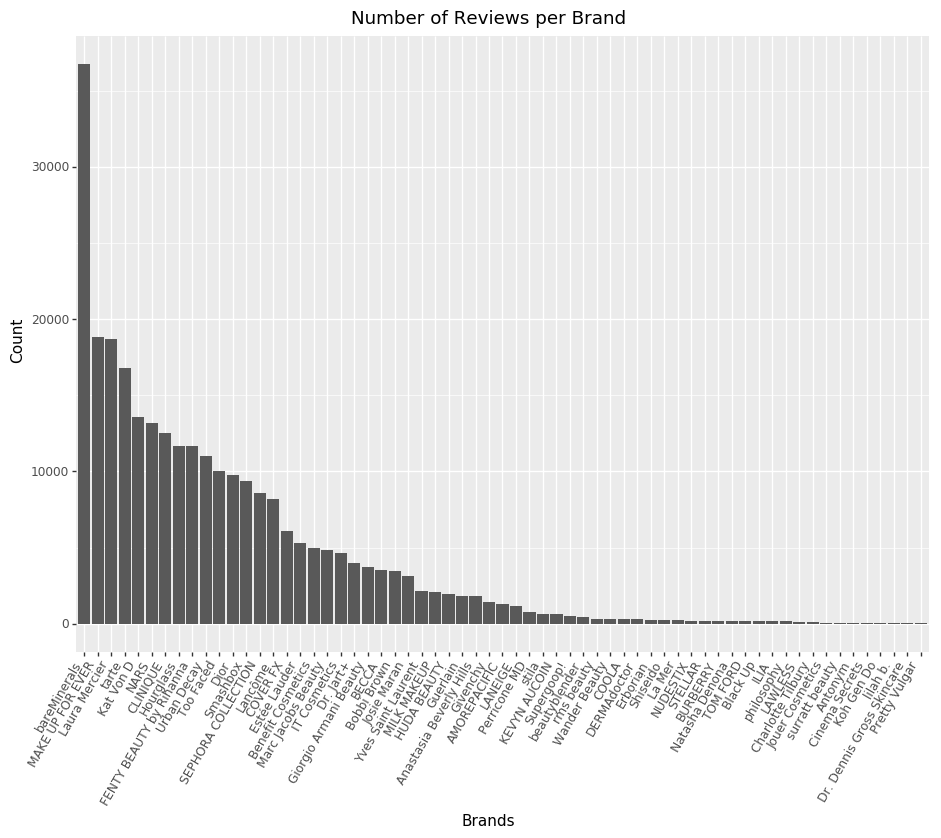

<ggplot: (-9223372029321770047)>

In [46]:
#reorder data frame by value counts of brand
brand_list = df['brand'].value_counts().index.tolist()
brand_cat = CategoricalDtype(categories=brand_list, ordered = True)
df['brand_cat'] = df['brand'].astype(str).astype(brand_cat)


warnings.filterwarnings("ignore")
(p9.ggplot(df, aes('brand_cat')) +
geom_bar() +
theme(figure_size = (11,8)) +
theme(axis_text_x=element_text(rotation=60, hjust=1)) +
ggtitle('Number of Reviews per Brand') + 
xlab('Brands') + 
ylab('Count'))

The most popular brand by reviews is Bare Minerals, and it is not particularly close. All of Bare Minerals' products pull in a total of over 30,000 reviews. The next closest brands are Laura Mercier and MAKE UP FOR EVER. Both brands pull in slightly below 20,000 total reviews. 

From a foundation standpoint, it makes sense that Bare Minerals is so popular. Their main focus when it comes to what they sell is foundation and mainly other face cosmetics like blush. Using a bit of anecdotal evidence, most girls when I was in middle and high school only used M.A.C. or Bare Minerals for their foundation. Brands like tarte, Stila, and Urban Decay were still popular but for other products like eyeshadow, eyeliner, mascara, lipstick, and more. Bare Minerals also helped popularize loose mineral powders for foundation as opposed to compact powders. Loose, mineral powders remain to be very popular among a whole host of brands today.

In [47]:
#create new brand_df data frame with aggregated info about brands
brands = list(df['brand'].unique())
avg_reviews = [round(df[df['brand'] == i]['rating'].mean(),2) for i in brands]
count = df['brand'].value_counts()
brand_df = pd.DataFrame({'brand':brands, 'AverageReview':avg_reviews, 'Count': count}).reset_index(drop=True)
brand_df.head()

,brand,AverageReview,Count
0,FENTY BEAUTY by Rihanna,4.10,36801
1,MAKE UP FOR EVER,4.08,18807
2,Giorgio Armani Beauty,4.24,18729
3,Estée Lauder,4.39,16828
4,IT Cosmetics,4.02,13544


### Average Reviews by Brand

In [48]:
#function to find 95% CI for ratings
def ninety_five_CI(brand):
    
    """
    input: brand
    output: lower and upper confidence limits for brand in data frame
    """
    dat = df[df['brand'] == brand]
    sdv = np.std(dat['rating'])
    lower = np.mean(dat['rating']) - (1.96*(sdv/math.sqrt(len(dat))))
    upper = np.mean(dat['rating']) + (1.96*(sdv/math.sqrt(len(dat))))
    return(lower, upper)

#add upper and lower limits of rating CI to brand_df
brand_df['lower_rating_lim'] = [ninety_five_CI(i)[0] for i in brand_df['brand']]    
brand_df['upper_rating_lim'] = [ninety_five_CI(i)[1] for i in brand_df['brand']]

#reorder brand_df to go in descending order based on 'AverageReview'
brand_order1 = brand_df.sort_values('AverageReview').reset_index(drop=True)['brand']
brand_df['brand'] = pd.Categorical(brand_df['brand'], categories=brand_order1, ordered=True)

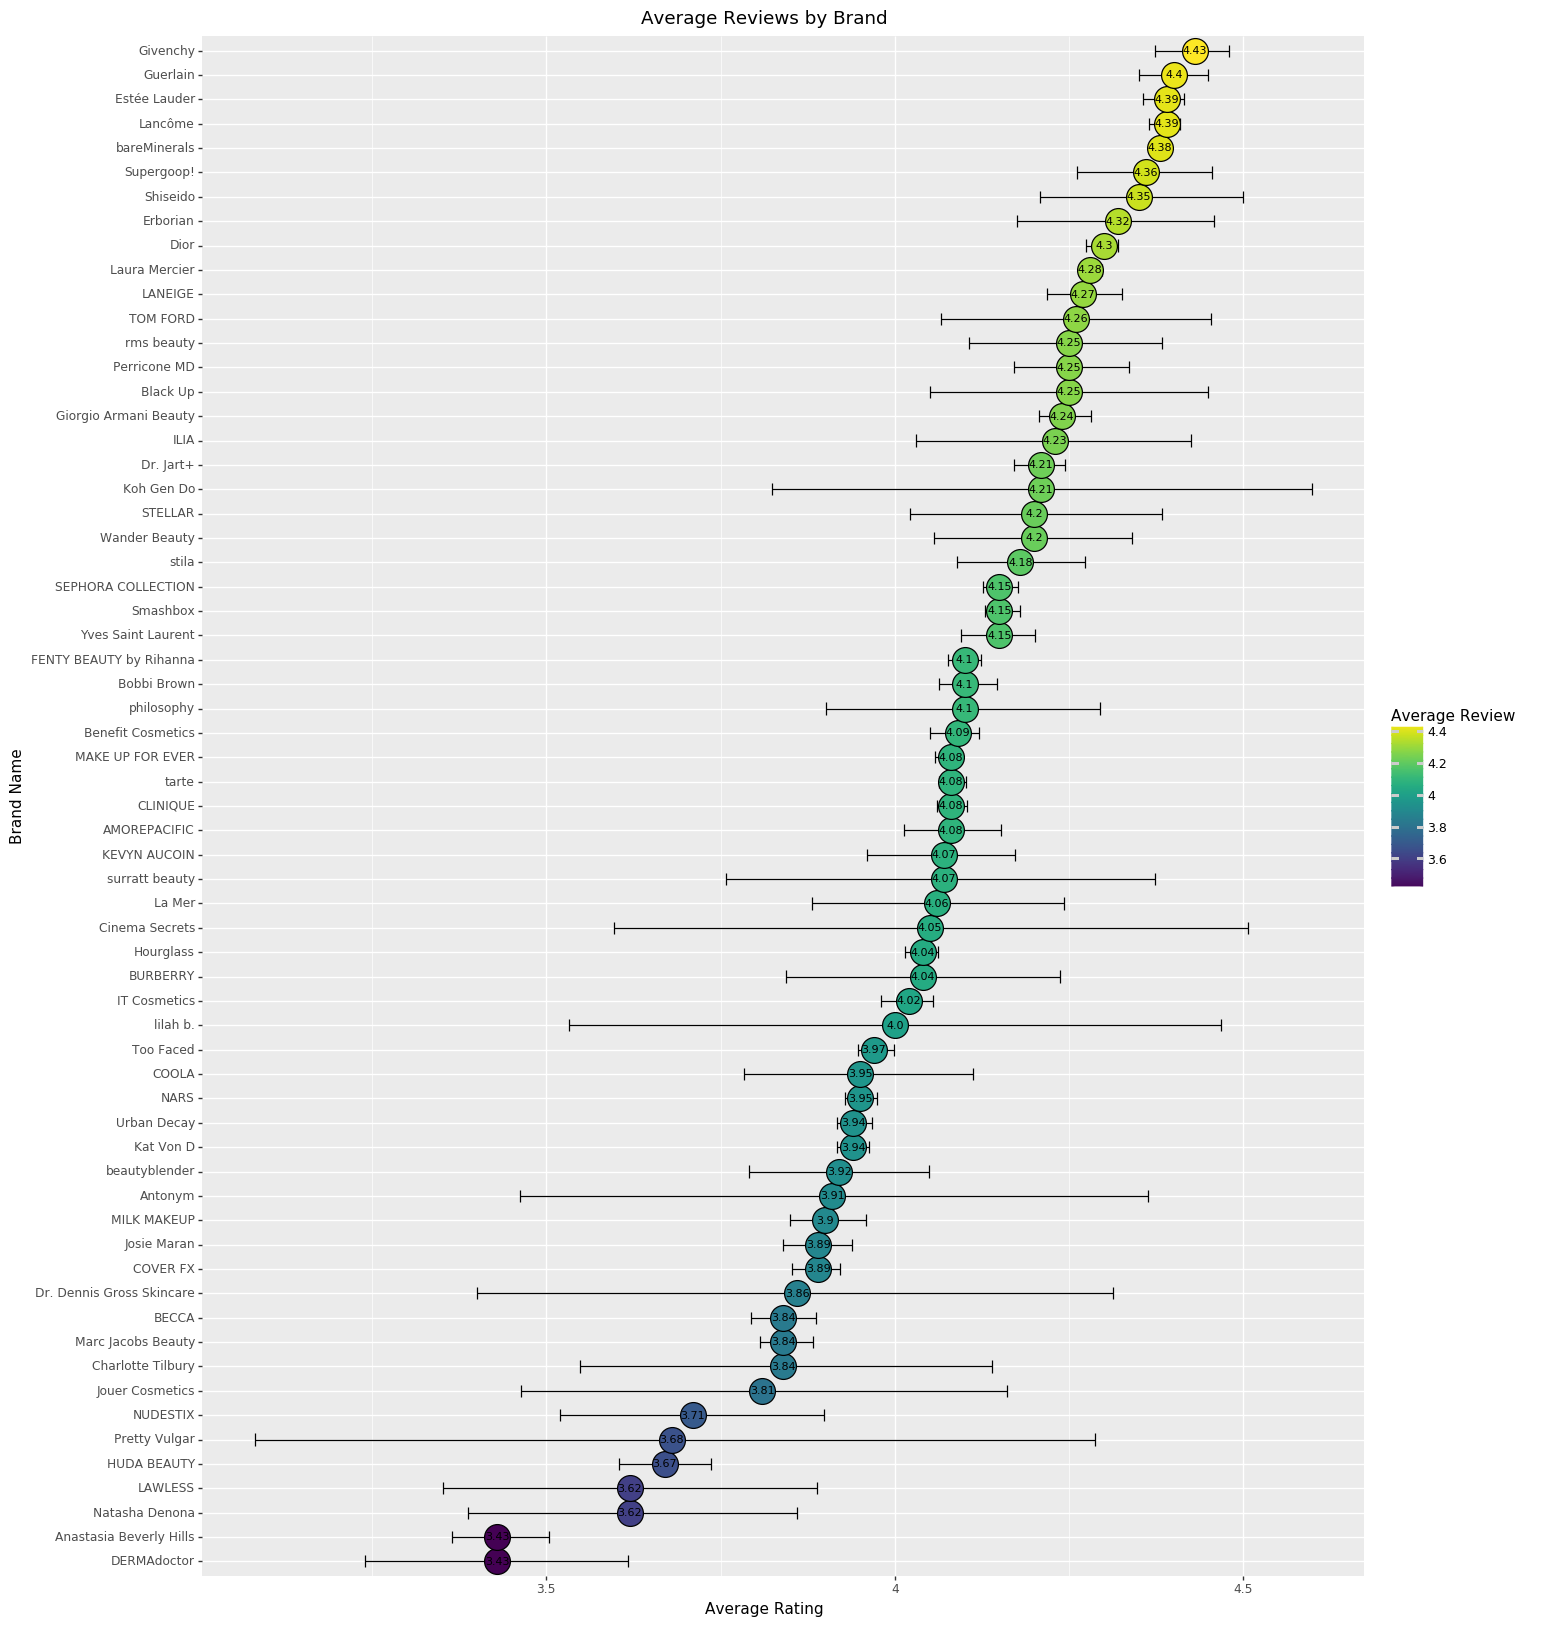

<ggplot: (7533734313)>

In [49]:
(p9.ggplot(brand_df, aes(x='brand',y='AverageReview', label = 'AverageReview', fill = 'AverageReview')) + 
geom_errorbar(aes(ymin='lower_rating_lim', ymax='upper_rating_lim'), color="black") +
geom_point(stat='identity', size = 10) +
geom_text(color = 'black', size = 8) +
theme(figure_size = (15,20)) +
coord_flip() +
ggtitle('Average Reviews by Brand') +
ylab('Average Rating') +
xlab('Brand Name') +
labs(fill = 'Average Review'))

The average review for foundation by brand is shown above. As can be seen, the lowest average reviews rest around 3.4 while the highest go to 4.43.

Something that I think is worth noting is how many of the most expensive / "luxury" brands have the highest ratings. The highest rated foundations come from Givenchy, Guerlain, Estée Lauder, and Lâncome. One of my favorite luxury foundation brands, Giorgio Armani, also comes in the top 20. Brands that tend to gear themselves more towards a younger generation such as Too Faced, Kat Von D, Urban Decay, Benefit Cosmetics, and Anastasia Beverly Hills tend to not do as well in average ratings. These brands that go for a younger crowd also tend to be a bit cheaper, though at Sephora, it is rare to find any makeup that can rival drug store makeup prices.

The question that may be worth exploring in the future is if ratings for luxury brands are inflated due to the customer wanting to like an expensive product. For example, I love my Giorgio Armani Luminous Silk Foundation. I also pay over $60 for each bottle. It is possible that I am less willing to criticize the foundation because of the hefty price I paid. In addition, I am also enamored by the packaging and luxuriousness of just the packaging. That could also be an incentive for me to be less critical. Perhaps in the future, it would be an interesting endeavor to do a some sort of sentiment analysis of the text of reviews for all the foundations.

I would also like to point out that Bare Minerals performs extraordinarily well for having over 30,000 reviews.

The black bars around the points represent the 95-percent confidence intervals for the average reviews. I felt that it was insufficient to only include the average reviews because that does not account for the number of people reviewing the product. For example, let's say we have two products: Product A and Product B. Product A has an average rating of 5 stars out of 5 stars but only has 1 review. Product B has an average rating of 4.8 stars with over 50 reviews. It would make sense to trust Product B since it has far more reviews. This is the reason I included the confidence intervals. The wider the confidence interval, the less reviews the product has, which is why the interval is larger, and thus, the average review is less trustworthy. On the other hand, Bare Minerals' 95-percent confidence interval is not even visible because it has over 30,000 reviews. Thus, we do not have to be wary of the brand's high rating.

### Bayesian Adjustment of Average Review

In the plot above, we showed the average rating of each brand with a 95 percent confidence band. The confidence band shows how much we should trust the average rating because the smaller the confidence band, the more reviewers that reviewed products from that brand. Now, we want to be able to adjust the average rating to adjust for the total number of people who reviewed the products from the brand. In order to do this, we are going to attempt to use a Bayesian model with our multicategory rating data. Because our categorical data is ordinal, we are going to take the sum of the marginal posterior distributions multiplied by the weight of each rating category to get our final Bayesian adjusted score. The goal is that the Bayesian adjusted score will push down the score of brands with fewer reviews.

#### Statistics Behind Code Below:

#### Multicategory Data
We are going to assume our data has a multinomial distribution with a dirichlet prior. There is no particular science of creating priors. The reason I am choosing a multinomial distribution is because each of my ratings is a category. 

The theory goes like this:
Let $X^{(i)} =$ sampling units from category i.

$X: (X^{(1)}, X^{(2)}, X^{(3)}, X^{(4)}, X^{(5)})$ is singular $Multinomial_{5}(n; \theta_{1}, \theta_{2}, ..., \theta_{5})$ where $\theta_{i} =$ population fraction for category i.

$0 < \theta_{i} < 1$ for all $i$ in (1,5).

We also know that $$\sum_{i = 1}^5 \theta_{i} = 1$$ and $$\sum_{i = 1}^5 X^{i} = n$$ where $n$ is the sum of the total number of reviews we have.

We say that $(X^{(1)}, ..., X^{(5)})$ (conditional of $\theta = (\theta_{1}, ..., \theta_{5})$) follows the (singular) $Multinomial_{5}(n; \theta_{1}, \theta_{2}, ..., \theta_{5})$ if the joint probability mass function of $(X^{(1)}, ..., X^{(5)})$ is given by $p(x^{(1)}, ..., x^{(5)})$ = $$\frac{n!}{x^{1}!...x^{5}!}\theta^{x^{1}}_1...\theta^{x^{5}}_5$$ 

$$\propto \theta_1^{x^{(1)} + \alpha_{1} - 1}...\theta_4^{x^{(4)} + \alpha_{4} - 1}(1 - \sum_{j=1}^{5-1}\theta_{j})^{x^{(5)}}\mathbb{1}_{\Delta_{5}(\theta_{1}, ..., \theta_{4})}$$

where $x^{(i)} \geq 0$ are integers and $\sum_{j=1}^{5}x^{j} = n$. Here, $\sum_{j=1}^{5}\theta_{j} = 1$ and $0 < \theta_{j} < 1$ for $j = 1,...,5$.

#### Conjuage Prior: Dirichlet Prior
Aim: Our aim is to find a class of prior for parameter $(\theta_1, ..., \theta_5)$. Notice that, due to the relationship $\sum_{j=1}^{5}\theta_j = 1$, a joint density for $(\theta_1, ..., \theta_5)$ does not exist. However, by convention, if we drop $\theta_5$ (since it can be expressed as $1 - \sum_{j=1}^{5-1}\theta_j$), then we can define a continuous joint distribution for $(\theta_1, ..., \theta_4)$.

The p.d.f. of $(\theta_1, ..., \theta_4)$ can be written as:

$$\pi(\theta_1, ... \theta_4) = \frac{1}{D(\alpha_1, \alpha_2, ..., \alpha_4)}\theta_1^{\alpha_1 - 1}...\theta_4^{\alpha_4 - 1}(1 - \sum_{j=1}^4\theta_j)^{\alpha_5 - 1}\mathbb{1}_{\Delta_{5}(\theta_{1}, ..., \theta_{4})}$$

where $\Delta_k = \{(\theta_1, ...,\theta_{5-1}): 0 < \theta_i < 1$ for all i; $\sum_{i=1}^4\theta_i < 1\}$.

#### Posterior Distribution

The posterior distribution can be written as:

$$\pi(\theta_1, ..., \theta_4 | X^{(1)}, ..., X^{(5)}) \propto p(X^{(1)}, ..., X^{(5)} | \theta_1, ..., \theta_4)\pi(\theta_1, ..., \theta_4)$$

This is equivalent to $Dirichlet_5(\alpha_1 + x^{(1)}, ..., \alpha_1 + x^{(5)})$.

In order to find the new Bayesian rating, we are going to find the expectation of the expectation of the marginal posterior distribution for each $\theta_j$ for any given brand. After that, we will multply that value by the rating $j$ because our multicategory data is ordinal. Then, we will sum all five expectations of the marginal posterior multiplied by $j$ to get our new Bayesian average. 

- marginal posterior distribution of $\theta_j$ is $Beta(\alpha_j + x^{(j)}, \sum_{i \neq j}^4\alpha_i + x^{(i)})$
- expectation of the marginal posterior distribution of $\theta_j$: $E[\pi(\theta_j|X^{(1)}, ..., X^{(5)})] = [\frac{\alpha_j + x^{(j)}}{\sum_{i=1}^5\alpha_i + x^{(i)}}]$
- average star value with Bayesian adjustment: $\sum_{j = 1}^5jE[\pi(\theta_j|X^{(1)}, ..., X^{(5)})]$

#### Picking a Prior:
In order to keep our prior fairly non-informative (because we don't our Bayesian estimate to weigh the prior too much), the prior is going to be the fraction of reviews that are 1 star, 2 star, etc. for the entire dataset multiplied by 5 such that each $\alpha_j$ in the prior can be written as $5 \times P(j)$.

In [50]:
df['rating'] = df['rating'].astype(float)
alpha_list = [((len(df[df['rating'] == 1])/len(df))),
              ((len(df[df['rating'] == 2])/len(df))),
              ((len(df[df['rating'] == 3])/len(df))),
              ((len(df[df['rating'] == 4])/len(df))),
              ((len(df[df['rating'] == 5])/len(df)))]

def bayesian_adj(alphas, brand):
    
    """return bayesian adjusted average for brand"""
    dat = df[df['brand'] == brand]

    exp_one = (alphas[0] + len(dat[dat['rating'] == 1]))/(5+len(dat))
    exp_two = 2*((alphas[1] + len(dat[dat['rating'] == 2]))/(5+len(dat)))
    exp_three = 3*((alphas[2] + len(dat[dat['rating'] == 3]))/(5+len(dat)))
    exp_four = 4*((alphas[3] + len(dat[dat['rating'] == 4]))/(5+len(dat)))
    exp_five = 5*((alphas[4] + len(dat[dat['rating'] == 5]))/(5+len(dat)))
    
    return exp_one + exp_two + exp_three + exp_four + exp_five

brand_df['bayesian'] = [bayesian_adj(alpha_list, i) for i in brand_df['brand']]

In [51]:
#creating new data frame for plot legend
ratings_df_1 = brand_df[['brand', 'AverageReview']]
ratings_df_2 = brand_df[['brand', 'bayesian']]

ratings_df_1['type'] = 'average'
ratings_df_2['type'] = 'bayesian'

ratings_df_1 = ratings_df_1.rename(index=str, columns={'AverageReview': 'Score'})
ratings_df_2 = ratings_df_2.rename(index=str, columns={'bayesian': 'Score'})

ratings_df_list = [ratings_df_1,ratings_df_2]
ratings_df = pd.concat(ratings_df_list)

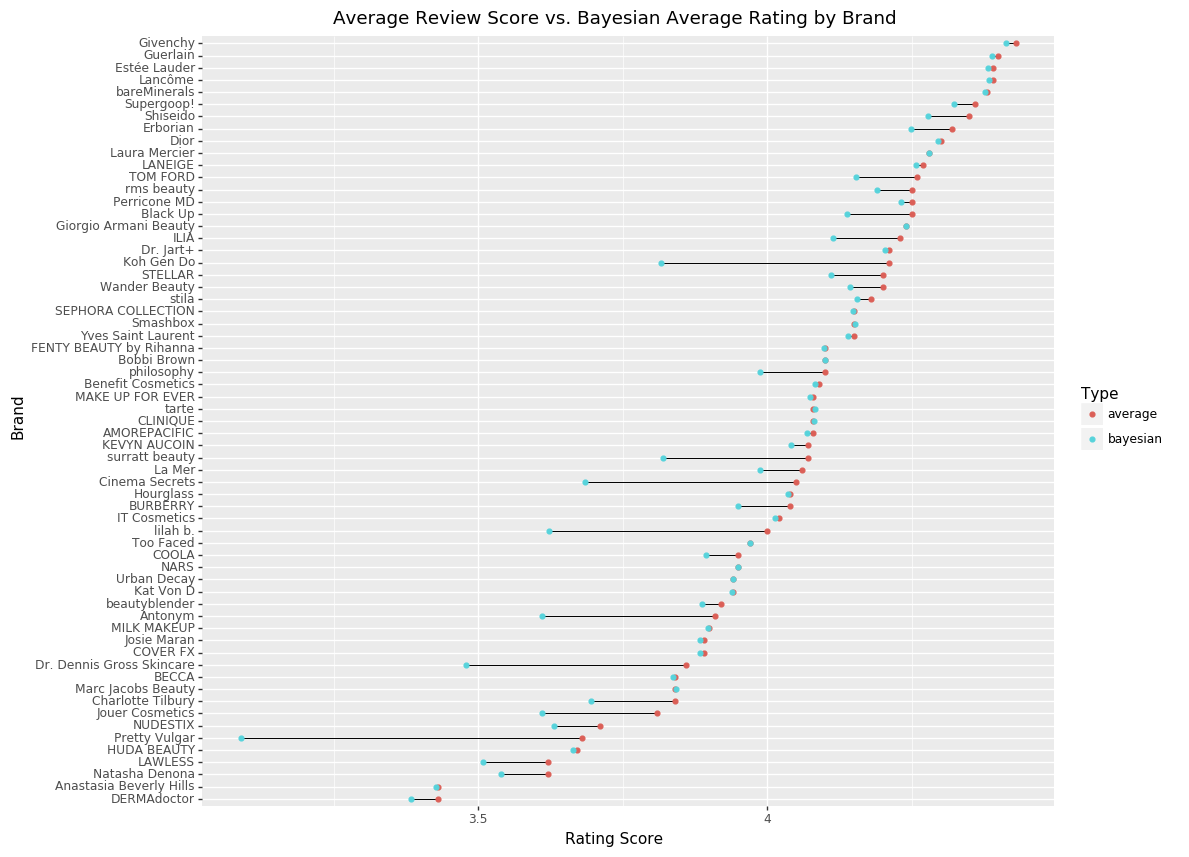

<ggplot: (7535476835)>

In [52]:
(p9.ggplot() + 
 geom_segment(brand_df, 
              aes(x = 'AverageReview', xend = 'bayesian', y = 'brand', yend = 'brand'),
              size = 0.4
             ) +
 geom_point(ratings_df, aes(x='Score', y = 'brand', color = 'type')) +
 theme(figure_size = (11,10)) + 
 ggtitle('Average Review Score vs. Bayesian Average Rating by Brand') +
 xlab('Rating Score') + 
 ylab('Brand') +
 labs(color = 'Type') +
 scale_color_discrete(values = ['Average Rating', 'Bayesian Average']))


As we can see from the plot above, the Bayesian estimate does tend to drag down the average score for those brands with fewer reviews, but the scores for brands with many reviews do not move as much. Bare Minerals, for example, does not move at all. The issue with this Bayesian average is that we want the denominator of all the reviews plus the prior to pull averages down, but that may not always happen if the numerator is higher or if the deonominator is so small due to minimal reviews that it actually pulls the score up. Either way, the Bayesian estimate is in no way perfect, but it does at least paint weight the number of reviews per product in its score, and that is very important information for people who want to buy foundations from these brands.

### Average Foundation Price by Brand

In [53]:
brands = list(df['brand'].unique())
avg_reviews = [round(df[df['brand'] == i]['rating'].mean(),2) for i in brands]
count = df['brand'].value_counts()
brand_df = pd.DataFrame({'brand':brands, 'AverageReview':avg_reviews, 'Count': count}).reset_index(drop=True)

#Change price formatting to float and get rid of price ranges and dollar signs
df['price'] = [i[-6:] for i in df['price']]
df['price'] = [float(i.replace("$", "")) for i in df['price']]

#take average price for each brand and add it to brand_df
brand_df['average_price'] = [round(df[df['brand'] == i]['price'].mean(),4) for i in brand_df['brand']]

#reorder brand_df to go in descending order based on 'average_price'
brand_order = brand_df.sort_values('average_price').reset_index(drop=True)['brand']
brand_df['brand'] = pd.Categorical(brand_df['brand'], categories=brand_order, ordered=True)

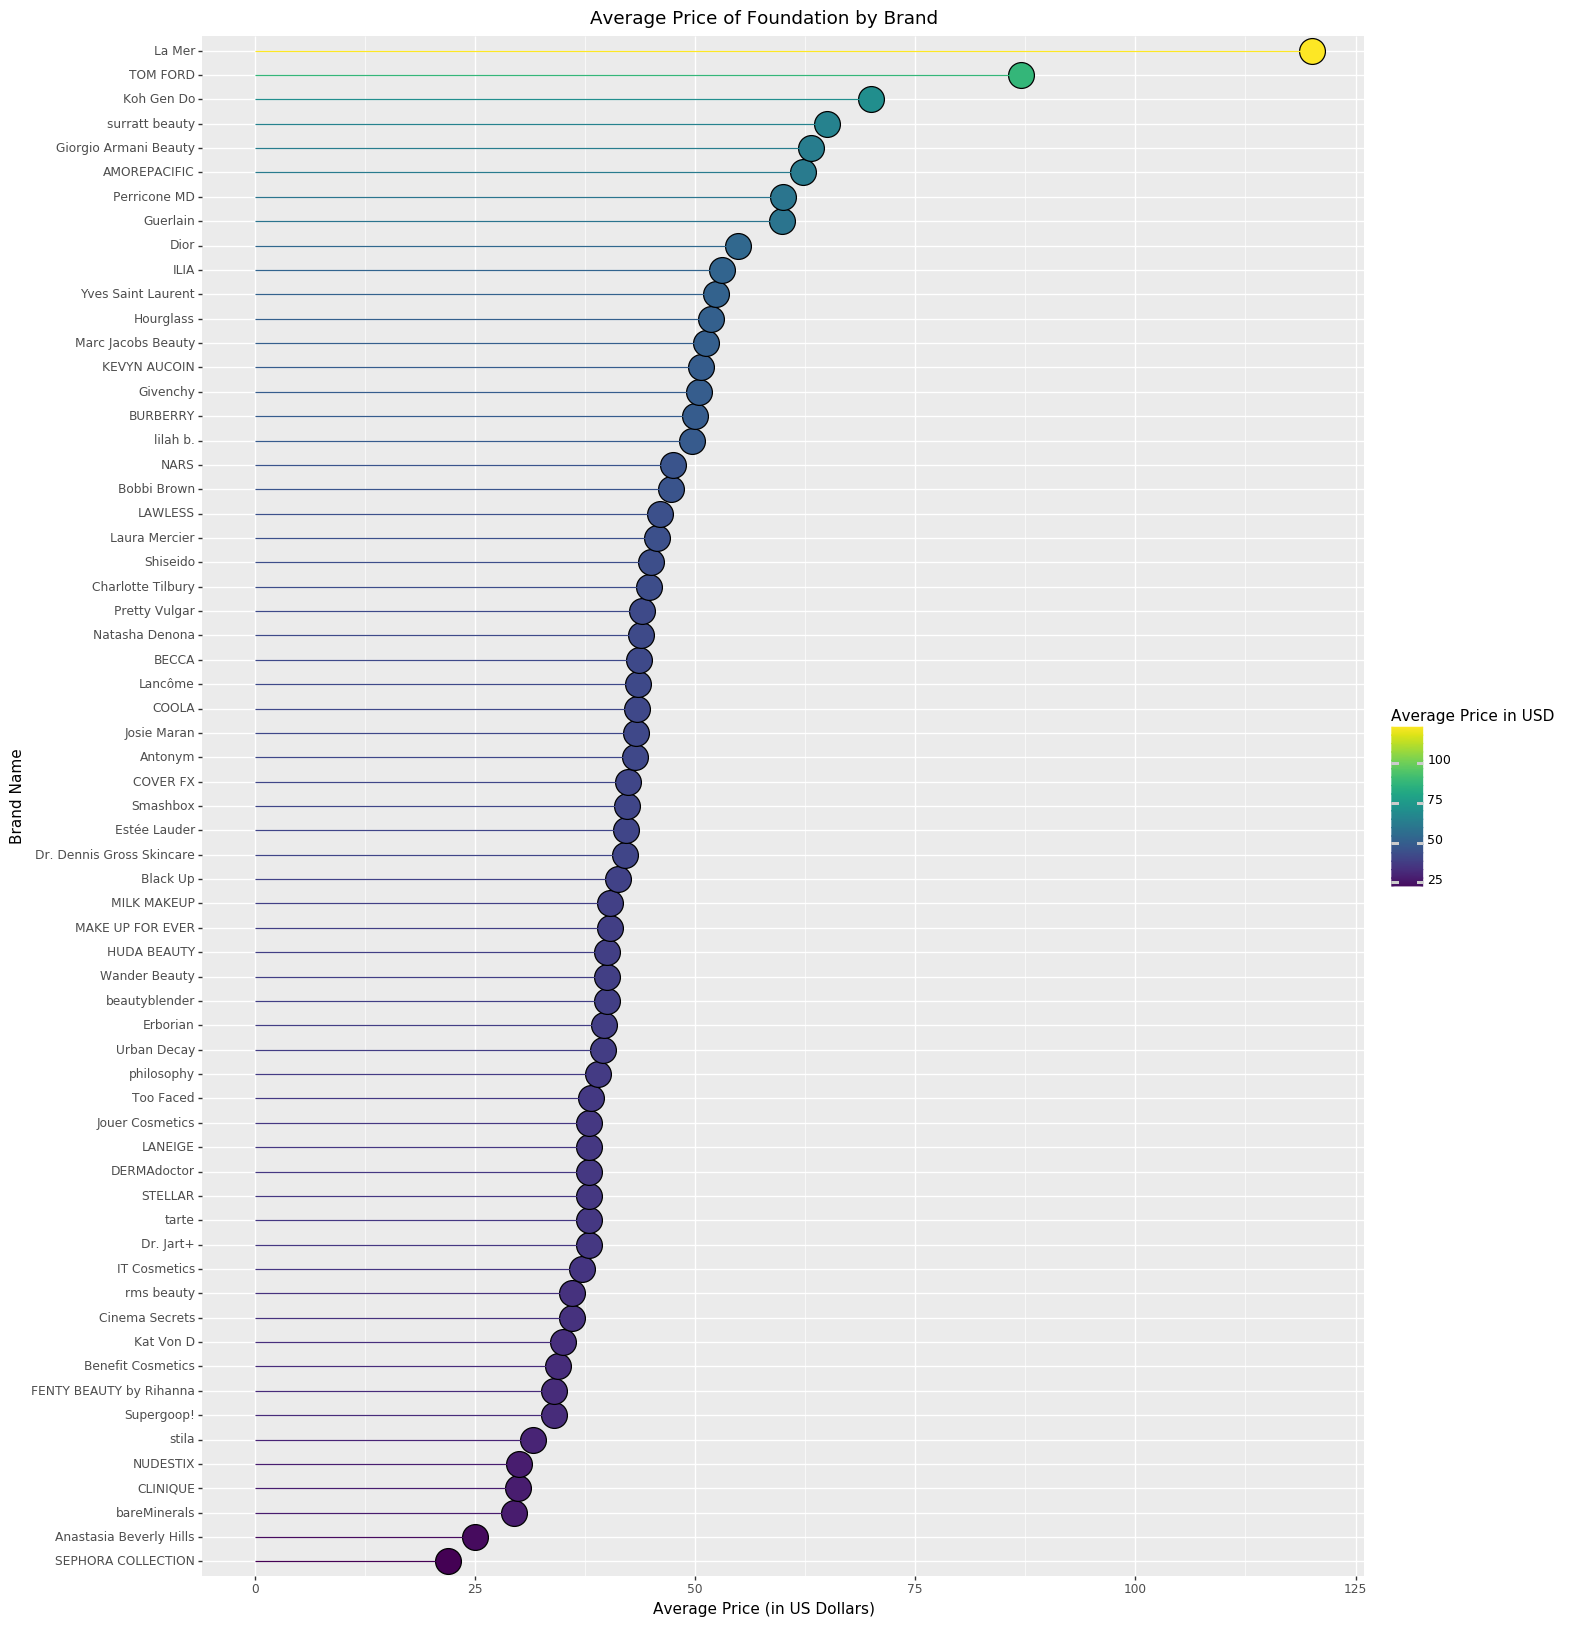

<ggplot: (-9223372029321617562)>

In [54]:
(p9.ggplot(brand_df, aes(x = 'brand', y = 'average_price', label = 'average_price', fill = 'average_price')) + 
geom_point(stat='identity', size = 10) + 
geom_segment(aes(y=0,
                x = 'brand',
                yend = 'average_price',
                xend = 'brand', 
                color = 'average_price')) +
theme(figure_size = (15,20)) +
coord_flip() +
ggtitle('Average Price of Foundation by Brand') +
ylab('Average Price (in US Dollars)') +
xlab('Brand Name') + 
labs(fill = 'Average Price in USD', color = 'Average Price in USD'))

Something else we thought was worth looking into was the relationship between price and brand. Naturally, the more luxurious brands like Tom Ford and La Mer have average prices near or over 100 dollars per foundation. And the Sephora Collection, Sephora's in-house brand, has the lowest average cost that is under 25 dollars per foundation. It is also worth noting that Bare Minerals remains very low in cost for foundation as well compared to other brands.

### How Does the Average Price of a Brand Relate to Its Average Rating?

One of the reasons we are interested in this is because we wanted to test whether or not a higher price meant that the brand was better. Below, we created a plot with each point as the image of the brand's logo.

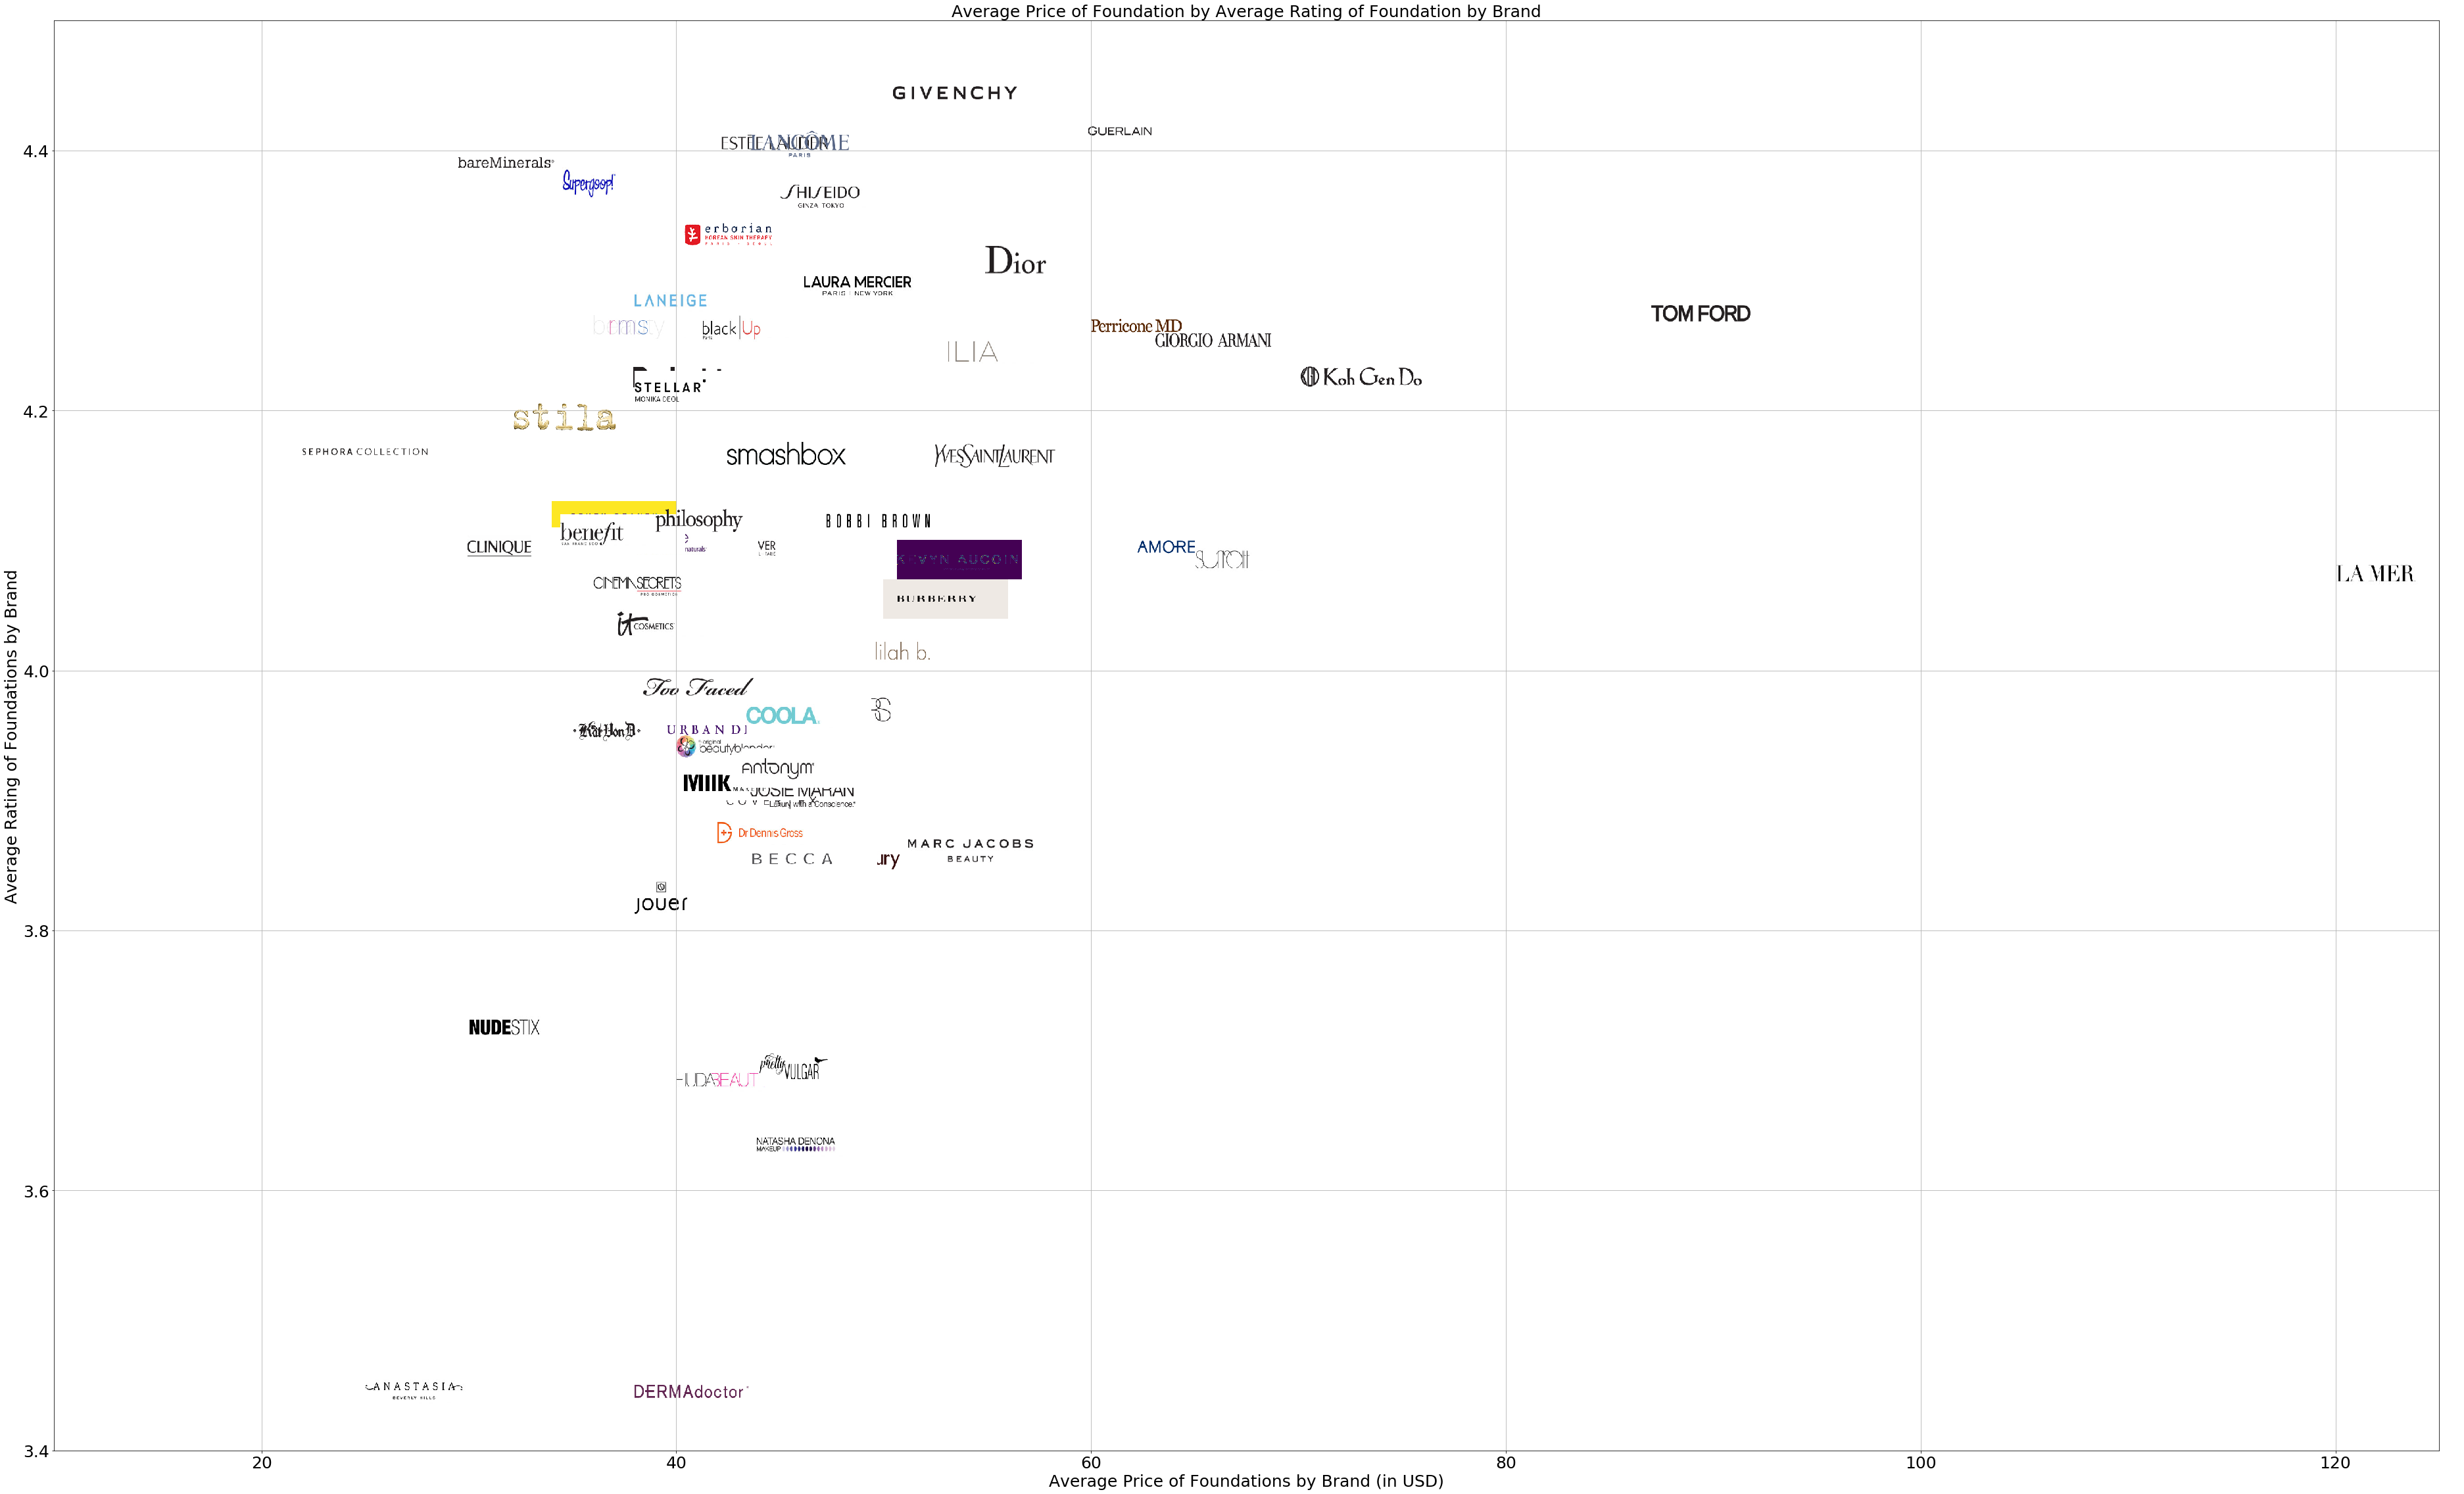

In [14]:
### Adding to brand_df
brand_df['image_path'] = [df[df['brand'] == i].iloc[0]['brand_image_url'] for i in brand_df['brand']]

def read_img(url):
    """Returns image for each url link to image"""
    response = requests.get(url)
    img = Image.open(io.BytesIO(response.content))
    return img

#add column to brand_df that finds every image for brand
brand_df['image'] = [read_img('https://www.sephora.com' + i) for i in brand_df['image_path']]

#get numpy array for every image
brand_df['image_array'] = [np.array(i) for i in brand_df['image']]


### Plotting
fig = plt.figure()
ax = fig.add_subplot(111)
def plotImage(x, y, im):
    
    """Returns point on plot with x,y coordinates and img for point"""
    
    #code from: https://stackoverflow.com/questions/25329583/matplotlib-using-image-for-points-on-plot
    
    bb = Bbox.from_bounds(x,y,6,0.03)  
    bb2 = TransformedBbox(bb,ax.transData)
    bbox_image = BboxImage(bb2,norm = None,origin=None,clip_on=False)

    bbox_image.set_data(im)
    ax.add_artist(bbox_image)

#plot point for every row in brand_df
for i,j,k in zip(brand_df['average_price'], brand_df['AverageReview'], brand_df['image_array']):
    plotImage(i,j,k)
    
ax.set_ylim(3.4,4.5)
ax.set_xlim(10,125)
ax.set_title('Average Price of Foundation by Average Rating of Foundation by Brand', fontsize = 25)
ax.tick_params(axis='both', labelsize = 25)
ax.set_xlabel('Average Price of Foundations by Brand (in USD)', fontsize = 25)
ax.set_ylabel('Average Rating of Foundations by Brand', fontsize = 25)
plt.gcf().set_size_inches(65,40)
plt.grid(b=True, axis='both')

Looking at this plot, it is clear to us that there is no real relationship between average price of a brand and average rating. Most of the brands seem to concentrate around 20 to 60 dllars for foundations, but the few brands that break away from this are Koh Gen Do, Tom Ford, and La Mer. In addition, we see a concentration of high-end brands in approximately the top-right of the plot. These brands include La Mer, Tom Ford, Koh Gen Do, Yves Saint Laurent, Giorgio Armani, Dior, and Givenchy.

### How Does Rating Relate to Price?

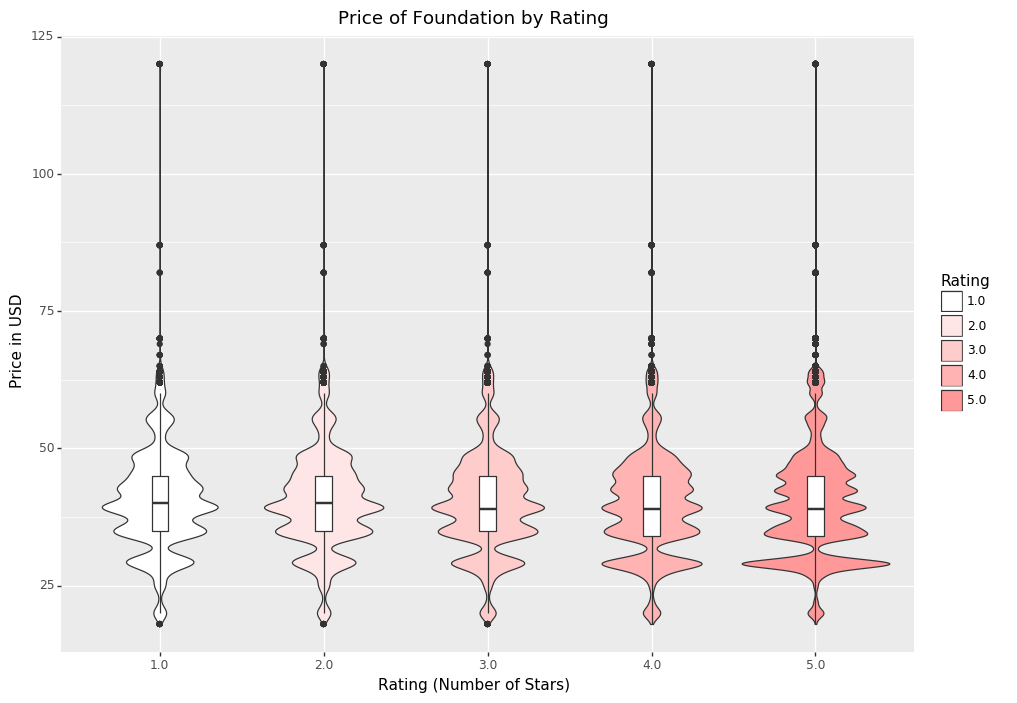

<ggplot: (276347235)>

In [16]:
#convert ratings back to strings
df['rating'] = df['rating'].astype(str)
(p9.ggplot(df, aes(x = 'rating', y = 'price')) + 
 geom_violin(aes(fill = 'rating')) +
 geom_boxplot(size = 0.5, width = 0.1) +
 scale_fill_manual(values=["#FFFFFF", "#ffe6e6", "#ffcccc", "#ffb3b3", "#ff9999"]) + 
 ggtitle('Price of Foundation by Rating') + 
 ylab('Price in USD') + 
 xlab('Rating (Number of Stars)') + 
 labs(fill = 'Rating') + 
 theme(figure_size = (11,8)))

It is very difficult to see if there are any differences between the groups of ratings in this plot. The groups all seem to follow similar distributions in terms of price and that is probably because we only have 220 products, but over 270,000 reviews. In order to see if there really is a difference in the price of foundations based on ratings, we ran an ANOVA test. Our null hypothesis was that the average price of foundation of all the groups of ratings are the same. Our alternative hypothesis is that at least one of the ratings groups is different in its average price of foundation.

In [17]:
#ANOVA TEST
mod = ols('price ~ rating',
                data=df).fit()
                
aov_table = sm.stats.anova_lm(mod, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
rating,1.543006e+04,4.0,43.257374,2.403034e-36
Residual,2.450064e+07,274745.0,NaN,NaN


Despite our violin plot not showing much insofar as how the distribution of the price of foundations changes within different ratings groups, our ANOVA test shows that we do reject the null and thus conclude that there are differences within groups of ratings, meaning that rating of a foundation and the price of a foundation are not independent of one another.

## Utilization of Reviewer Information

### Price of Foundation by Age Group

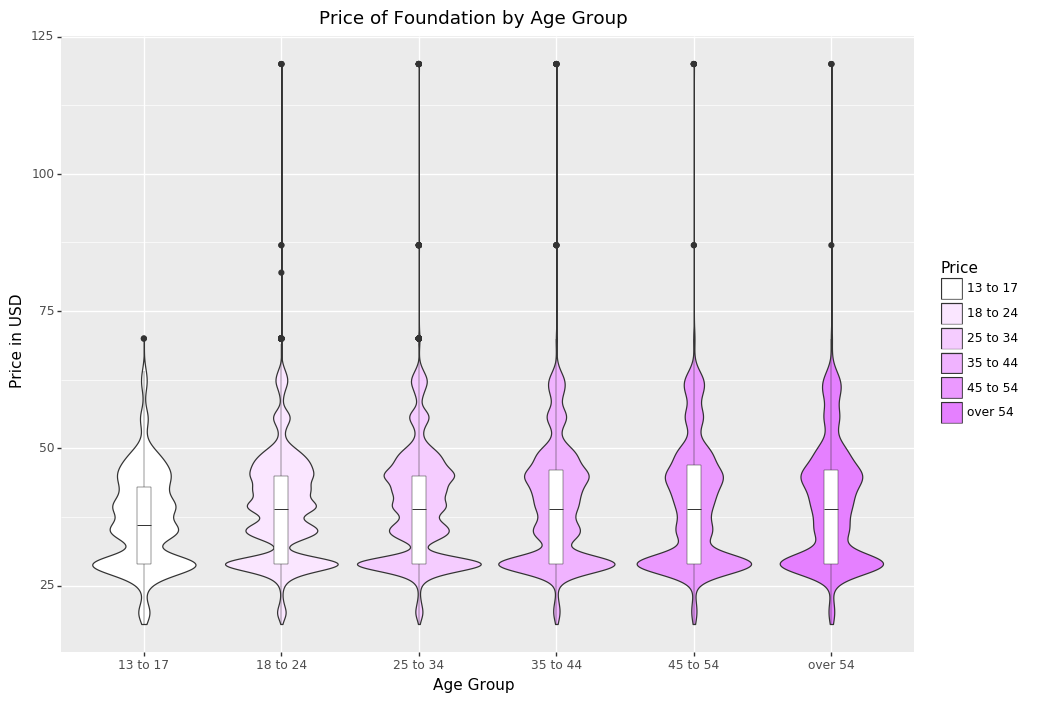

<ggplot: (-9223372029320469451)>

In [18]:
#subset total data frame to only include rows where age is not NA
dat = df.dropna(subset=['age'])
dat['age'] = [i.replace('to', ' to ') for i in dat['age']]
dat['age'] = [i.replace('over', 'over ') for i in dat['age']]

(p9.ggplot(dat, aes(x = 'age', y = 'price')) + 
 geom_violin(aes(fill = 'age')) + 
 geom_boxplot(width = 0.1, size = 0.2) +
 theme(figure_size = (11,8)) + 
 ggtitle('Price of Foundation by Age Group') + 
 ylab('Price in USD') + 
 xlab('Age Group') + 
 labs(fill = 'Price') + 
 scale_fill_manual(values=['#ffffff', '#fae6ff', '#f5ccff', '#f0b3ff', '#eb99ff', '#e580ff']))

In the plot above, we see a much clearer difference between groups. Each group represents an age group of the reviewer. This information is specified on Sephora reviews. We subsetted the original data frame to only include rows where the reviewer specified their age range. 

The plot shows what you would expect. Users between the ages of 13 and 17 do not gravitate towards products over 50 dollars, generally. And reviewers over the age of 54 tend to review more expensive products than other reviewers. The distribution of price of products between reviewers that are in the 45 to 54 age group and the over 54 age group lok to be very similar in the products they consume/review. 

In order to see more empiracally, whether or not there exists a difference in the distribution of price of foundations between age group, we ran an ANOVA test.

In [19]:
#ANOVA TEST
mod = ols('price ~ age',
                data=dat).fit()
                
aov_table = sm.stats.anova_lm(mod, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
age,3.331601e+04,5.0,68.221926,1.822967e-71
Residual,1.165490e+07,119330.0,NaN,NaN


The ANOVA test confirms exactly what we thought with the plot above. The null hypothesis was that the average price of foundation between age groups is the same. The alternative hypothesis is that at least one of the age groups has a different average price of foundation than the rest. 

With a p-value as low as seen above (effectively 0), we can reject the null hypothesis and conclude that the average foundation price differ between groups. 

### Skin Tone Analysis

In [57]:
#create new df for skin with no NAs for skin tone with important info about customer
skin=df[~df["skin_tone"].isna()]
skin=skin[["brand","name","rating","skin_type","eye_color","skin_concerns","skin_tone", "age","price","recommended"]]

#assign numerical value to skin complexion for ranking
tone_val={"porcelain":1,"fair":2,"light":3,"medium":4,"tan":5,"olive":6,"deep":7,"dark":8,"ebony":9}
skin['tone_val'] = pd.Series(skin["skin_tone"], index=skin.index)
skin=skin.replace({"tone_val": tone_val})


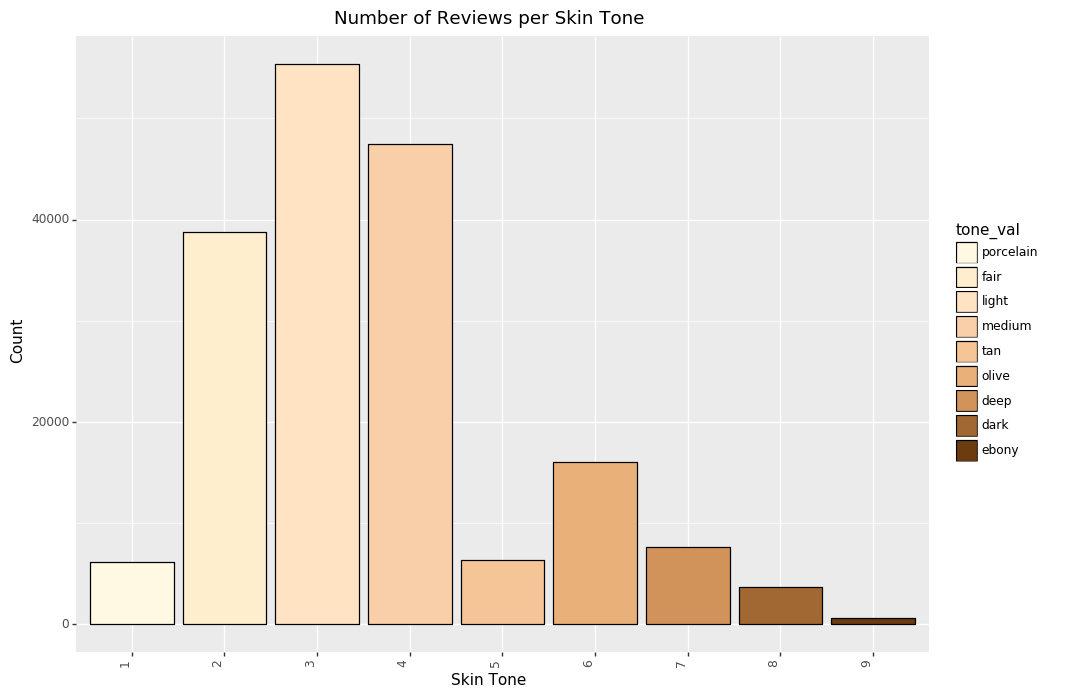

<ggplot: (7541837786)>

In [61]:
#Distribution of all skin tones given
skin_palette= ["#FFF8E3", "#FFEECD", "#FFE3C3","#F9CFA9", "#F5C598", "#EAB07A", "#D1935A", "#A16834", "#6B3C10"]
skin["tone_val"]=skin["tone_val"].astype(str)
(p9.ggplot(skin, aes(x='tone_val',fill="tone_val")) +
geom_bar(color="black") +
theme(figure_size = (11,8)) +
theme(axis_text_x=element_text(rotation=90, hjust=1)) +
ggtitle('Number of Reviews per Skin Tone') + 
xlab('Skin Tone') + 
ylab('Count')) +scale_fill_manual(labels =list(tone_val.keys()),values=skin_palette)

The vast majority of reviewers fall into skin complexions between porcelain, fair, light, and medium. While there does seem to be a little spike for people of olive complexion, there does not seem to be much representation of those who are deep, dark, or ebony. Part of this could be possibly attributed to the lack of shade diversity among many foundations. 

In [62]:
#Subset the products that have over a hundred reviews that provide skin tone
count=skin.groupby(["name"]).size().reset_index(name="count")
skin100 = count[count["count"]>=100]
skin100=skin[skin["name"].isin(skin100["name"])]
sorted_skin100=skin100.groupby(["brand"]).size().reset_index(name="count").sort_values(['count'], ascending=False) 

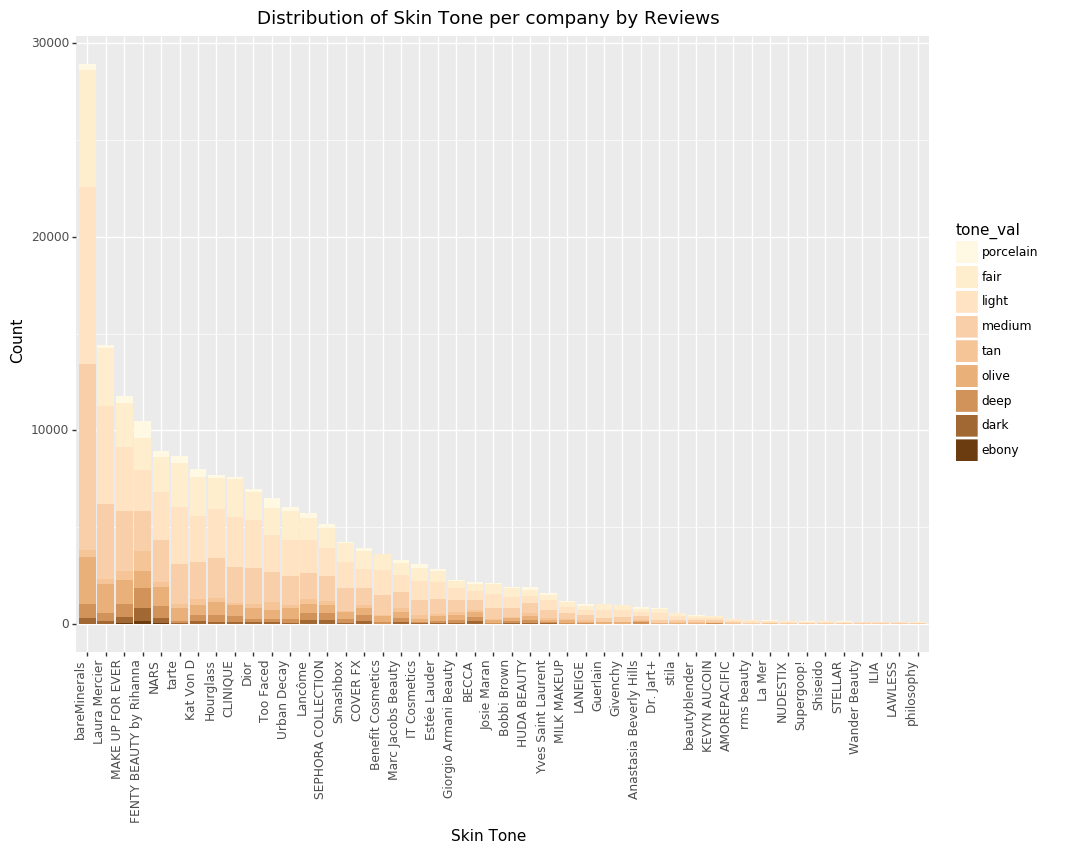

<ggplot: (-9223372029312820564)>

In [63]:
#Now, let's see brand dist.
(p9.ggplot(skin100, aes(x='brand',fill="tone_val")) +
geom_bar() +
theme(figure_size = (11,8)) +
theme(axis_text_x=element_text(rotation=90, hjust=1)) +
ggtitle('Distribution of Skin Tone per company by Reviews') + 
xlab('Skin Tone') + 
ylab('Count'))+scale_fill_manual(labels =list(tone_val.keys()),values=skin_palette)+ scale_x_discrete(limits = list(sorted_skin100["brand"]))
#overall population
#equalx = reorder(day, -perc)

This plot only shows the brands that have at least 100 reviews with skin tone information. It only further confirms what we already knew from the plot before. Most of the reviewers of these brands are in the lighter skin ranges. However, what is worth noting is how, for most brands, they do not have any people of ebony skin tones reviewing their products. In fact, the only brand in this plot with any noticable ebony representation is Fenty. This is not surprising because Fenty did get a lot of press for having 40 different foundation shades when their first foundation debuted. MAKE UP FOR EVER also has a very popular foundation (Ultra HD) that has 40 shades, but the actual diversity within those shades is much higher in Fenty's foundation. What this plot shows us is that there is a large group of women that the cosmetics industry, particularly in Western countries, is failing to create products for. 

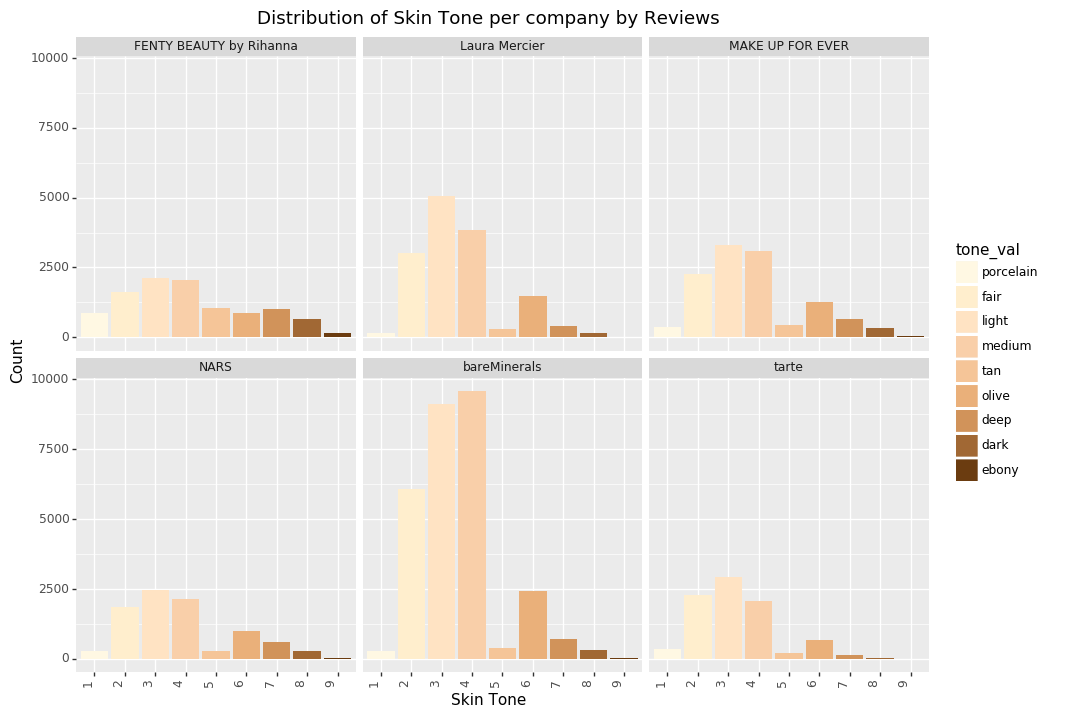

<ggplot: (7535542364)>

In [64]:
#5 most prevalent brands facet by brand, show rating avg
top_5_brand=skin100[skin100["brand"].isin(sorted_skin100["brand"][0:6])]
top_5_rating= pd.pivot_table(top_5_brand, columns = ['brand'], index = ['tone_val'], values = ['rating'], aggfunc = np.mean)
top_5_rating=pd.DataFrame(top_5_rating.unstack('brand').reset_index())
top_5_rating.columns = ['r', 'brand','tone_val','rating']
top_5_rating[['brand','tone_val','rating']]
#scaling rating to match existing y axis:
top_5_rating["scaled_rating"]=1250+1562.5*(top_5_rating["rating"]-1)



(p9.ggplot() +
geom_bar(top_5_brand, aes(x='tone_val',fill="tone_val")) +
#geom_point(top_5_rating, aes(x='tone_val',y='scaled_rating')) +
theme(figure_size = (11,8)) +
theme(axis_text_x=element_text(rotation=90, hjust=1)) +
ggtitle('Distribution of Skin Tone per company by Reviews') + 
xlab('Skin Tone') + 
ylab('Count'))+scale_fill_manual(labels =list(tone_val.keys()),values=skin_palette)+facet_wrap('~ brand')

In the plot above, we decided to show the skin tone distribution of the six most prevalent brands (calculated based on how many reviews the brand had). What is astounding is that two of the six brands, Laura Mercier and tarte, do not have a single person of ebony skin tone reviewing any of their foundations. All of the brands follow fairly similar distributions among the lighter complexions, with the highest count being under light or medium skin tone. However, we see Fenty and even MAKE UP FOR EVER shine a bit more than the other brands in the darker complexions. 

### Skin Concerns Analysis

In [67]:
skin_concern=df[~df["skin_concerns"].isna()]
skin_concern=skin_concern[~skin_concern["age"].isna()]
skin_concern=skin_concern[["skin_concerns","age"]]

skin_age_group=skin_concern.groupby(["skin_concerns","age"]).size().reset_index(name="count")
skin_age_group=pd.merge(skin_age_group,skin_concern.groupby(["age"]).size().reset_index(name="total")[["age","total"]],on='age')
skin_age_group["count"]=(skin_age_group["count"]/skin_age_group["total"])
skin_age_group=skin_age_group.drop(columns=["total"])

take_out=["cellulite","calluses","cuticles", 'stretchMarks']
skin_age_group=skin_age_group[~(skin_age_group["skin_concerns"].isin(take_out))]

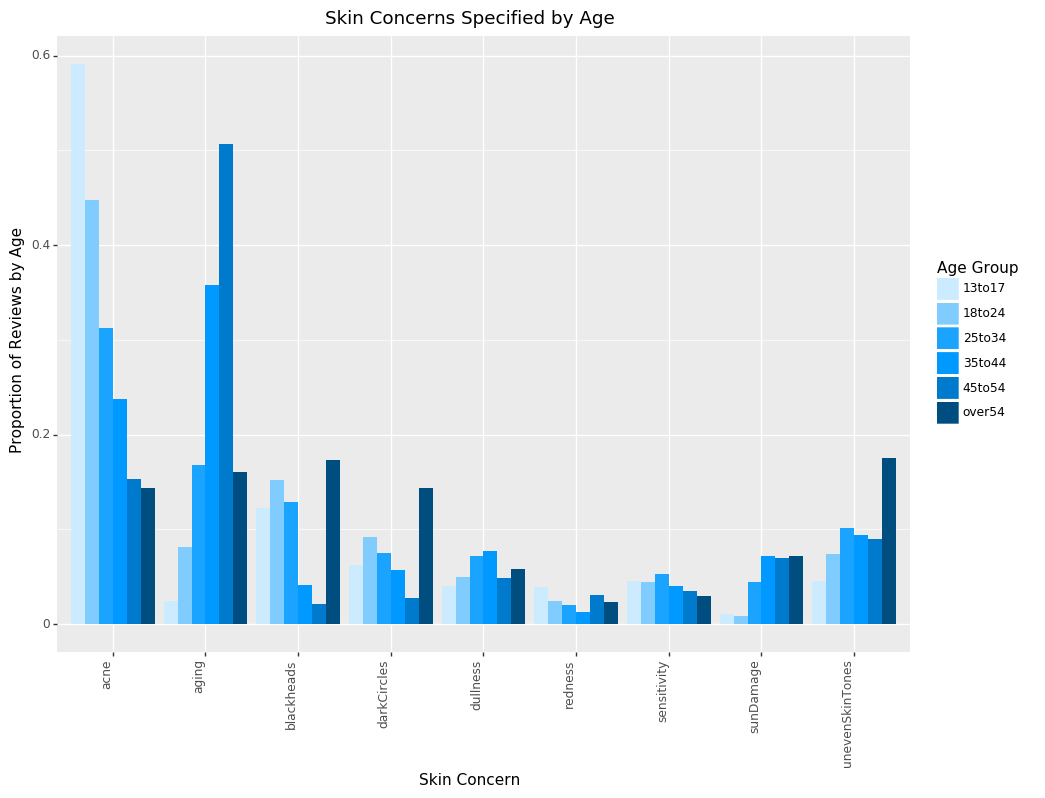

<ggplot: (7542223515)>

In [68]:
(p9.ggplot(skin_age_group, aes(x='skin_concerns',y="count")) +
geom_bar(aes(fill='factor(age)'),stat="identity",position="dodge") +
theme(figure_size = (11,8)) +
theme(axis_text_x=element_text(rotation=90, hjust=1)) +
ggtitle('Skin Concerns Specified by Age') + 
xlab('Skin Concern') + 
ylab('Proportion of Reviews by Age') +
scale_fill_manual(values = ['#ccebff', '#80ccff', '#1aa3ff', '#0099ff','#007acc', '#004d80']) +
labs(fill = 'Age Group'))#+scale_fill_manual(labels =list(tone_val.keys()),values=skin_palette)+ scale_x_discrete(limits = list(sorted_skin100["brand"]))


In the plot above, we wanted to see how the skin concerns of women changed as they aged. What we see is that acne is the largest concern for women who are between the ages of 13 to 17 and that drops for women consistently as they go into older age groups. Agin surprisingly, does not go up for women as they move into older age groups. While that trend does exist until women are between 45 and 54, the majority of women over 54 do not list aging as their top concern. The largest concern for women over 54 is blackheads and uneven skin tones. Dark circles are make up a small part of overall women's skin concerns, but it makes up a larger proportion of the largest skin concern for women over 54 because dark circles tend to become worse as women age.

## Analyzing The Tags Data

One of the great parts of Sephora's review API is it stores tags for reviews. This means that the review engine picks up on certain words that fall into people's reviews and counts them as tags. Thus, we can see what words pop up the most with certain foundations without needing to scrape the entire text of their review.

In [15]:
tags_df = pd.read_csv('/Users/sangeetharamamurthy/Desktop/SephoraFoundationAnalysis/Datasets/Sephora_Foundation_Tags.csv')

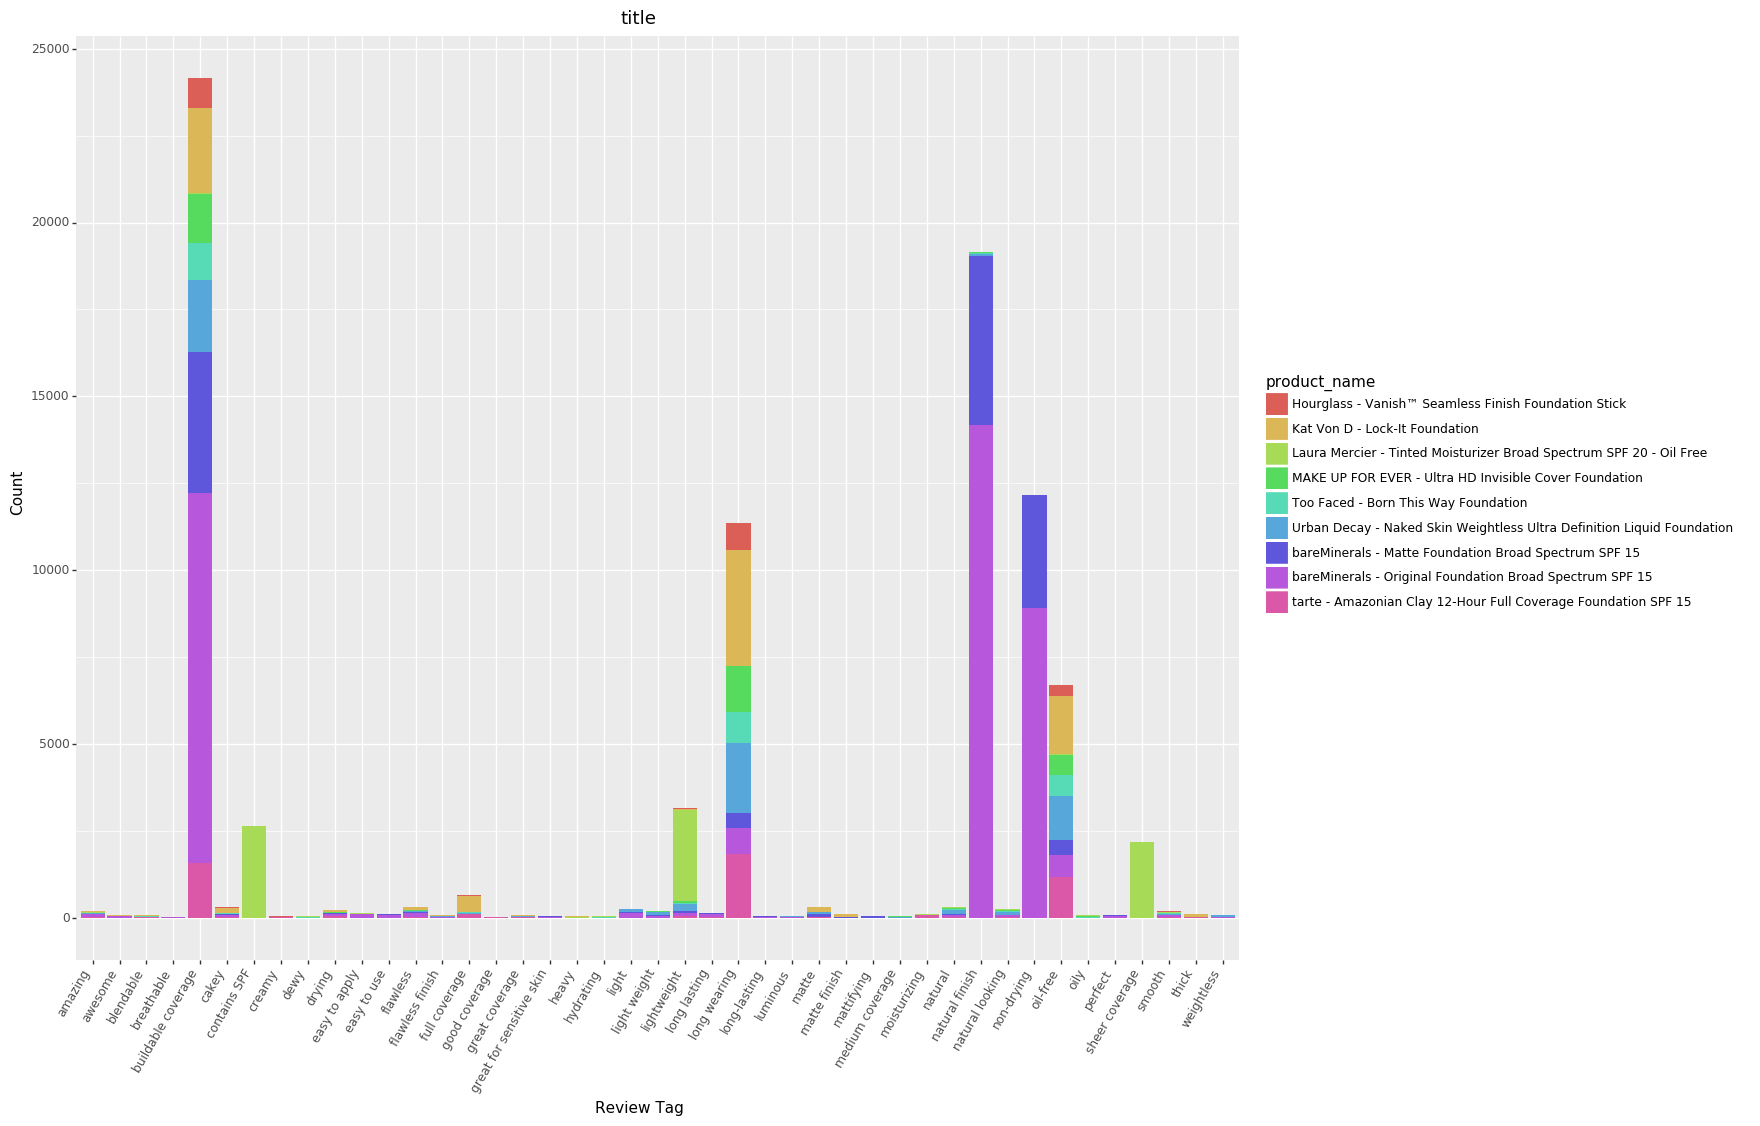

<ggplot: (-9223372029321973844)>

In [26]:
total_count = [sum(most_pop_foundations_tags[most_pop_foundations_tags['Value'] == i]['Count']) for i in most_pop_foundations_tags['Value'].unique()]
total_count_df = pd.DataFrame({'Tag': most_pop_foundations_tags['Value'].unique(),
              'Count': total_count})

total_count_df_high = total_count_df[total_count_df['Count'] > 30]

most_pop_foundations_tags = tags_df[tags_df['total_review_count'] > 5000]#
most_pop_foundations_tags = most_pop_foundations_tags[most_pop_foundations_tags['Value'].isin(total_count_df_high['Tag'])]

most_pop_foundations_tags['product_name'] = most_pop_foundations_tags['brand'] + ' - ' + most_pop_foundations_tags['product']

(p9.ggplot(most_pop_foundations_tags, aes(x = 'Value', y = 'Count', fill = 'product_name')) +
 geom_bar(stat='identity') +
 theme(axis_text_x=element_text(rotation=60, hjust=1)) + 
 theme(figure_size = (15,12)) +
 ggtitle('title') + 
 xlab('Review Tag'))

In order to get an idea of what tags are the most popular in reviews, I took the foundations that had at least 5000 total counts for all of their tags and plotted them. The most common tags are "buildable coverage", "contains SPF", "lightweight", "long wearing", "natural finish", "non-drying", "oil-free", and "sheer coverage". While four of the foundations in this plot have sun protection, only Laura Mercier's Tinted Moisturizer Broad Spectrum SPF 20 - Oil Free has that tag, and it is mentioned over 2500 times in reviews. We can tell by which tags Laura Mercier's Tinted Moisturizer dominates in, what type of product we are dealing with. It leads in containing SPF, being lightweight, and having sheer coverage. All of this is not surprising because it is a tinted moisturizer and only meant to give slight coverage. The tags that have the highest number of foundations represented are "blendable coverage", "long wearing", and "oil free". This is probably because these are some of the most important features of foundation. If it cannot blend well into the skin, then no one will want the foundation. Likewise, no one wants an oily foundation because that can lead to clogged pores and makeup that melts away.

While it is interesting to look at this data, we will not be using the tags data set for our prediction models because, while we have the tags, we do not have the context of how the reviewer used the tags. For example, MAKE UP FOR EVER's Ultra Hd Invisible Cover Foundation has a few counts in the "oily" tag. There is no way of knowing whether the reviewer was saying the product is not oily or oily, and the review API only picked up "oily." This is especially confusing because this same foundation has quite a few counts in the "oil-free" tag as well. 

## Correlation Matrix of Foundation Reviews

Something that we felt is worth looking into and understanding before we attempted any predictive modeling is how certain attributes of reviewers correlate with others. And thus, a correlation matrix felt like the perfect way to see this in action.

In [26]:
#convert rating column back to integer for averaging
df['rating'] = df['rating'].astype(float)

#proportions
one_star = []
two_star = []
three_star = []
four_star = []
#dummy variable drop
five_star = []

#average of total ratings
average_rating = []

#price given
price = []

#total number of reviews
count = []

#proportion
prop_rec = []
prop_not_rec = []
prop_no_rec = []

age13to17 = []
age18to24 = []
age25to34 = []
age35to44 = []
age45to54 = []
ageover54 = []
#dummy variable drop
no_age_given = []

skin_type_combination = []
skin_type_dry = []
skin_type_normal = []
skin_type_oily = []
#dummy variable drop
no_skin_type = []

skin_concerns_sensitivity = []
skin_concerns_acne = []
skin_concerns_aging = []
skin_concerns_blackheads = []
skin_concerns_redness = []
skin_concerns_darkCircles = []
skin_concerns_dullness = []
skin_concerns_sunDamage = []
skin_concerns_unevenSkinTones = []
skin_concerns_pores = []
skin_concerns_puffiness = []

#dummy variable drop
no_skin_concerns = []

skin_color_porcelain = []
skin_color_fair = []
skin_color_light = []
skin_color_medium = []
skin_color_tan = []
skin_color_olive = []
skin_color_deep = []
skin_color_dark = []
skin_color_ebony = []
no_skin_color = []

#aggregate values above for each product in data frame
for i in df['name'].unique():
    data = df[df['name'] == i]
    #data = data[~(data['recommended'].isna())]
    
    one_star.append(len(data[data['rating'] == 1])/len(data))
    two_star.append(len(data[data['rating'] == 2])/len(data))
    three_star.append(len(data[data['rating'] == 3])/len(data))
    four_star.append(len(data[data['rating'] == 4])/len(data))
    five_star.append(len(data[data['rating'] == 5])/len(data))
    
    average_rating.append(data['rating'].mean())
    
    price.append(data.iloc[0]['price'])
    
    count.append(len(data))
    
    prop_rec.append(len(data[data['recommended'] == True])/len(data))
    prop_not_rec.append(len(data[data['recommended'] == False])/len(data))
    prop_no_rec.append(len(data[data['recommended'].isna()])/len(data))
    
    age13to17.append(len(data[data['age'] == '13to17'])/len(data))
    age18to24.append(len(data[data['age'] == '18to24'])/len(data))
    age25to34.append(len(data[data['age'] == '25to34'])/len(data))
    age35to44.append(len(data[data['age'] == '35to44'])/len(data))
    age45to54.append(len(data[data['age'] == '45to54'])/len(data))
    ageover54.append(len(data[data['age'] == 'over54'])/len(data))
    no_age_given.append(len(data[data['age'].isna()])/len(data))
    
    
    skin_type_combination.append(len(data[data['skin_type'] == 'combination'])/len(data))
    skin_type_dry.append(len(data[data['skin_type'] == 'dry'])/len(data))
    skin_type_normal.append(len(data[data['skin_type'] == 'normal'])/len(data))
    skin_type_oily.append(len(data[data['skin_type'] == 'oily'])/len(data))
    no_skin_type.append(len(data[data['skin_type'].isna()])/len(data))

    skin_concerns_sensitivity.append(len(data[data['skin_concerns'] == 'sensitivity'])/len(data))
    skin_concerns_acne.append(len(data[data['skin_concerns'] == 'acne'])/len(data))
    skin_concerns_aging.append(len(data[data['skin_concerns'] == 'aging'])/len(data))
    skin_concerns_blackheads.append(len(data[data['skin_concerns'] == 'blackheads'])/len(data))
    skin_concerns_redness.append(len(data[data['skin_concerns'] == 'redness'])/len(data))
    skin_concerns_darkCircles.append(len(data[data['skin_concerns'] == 'darkCircles'])/len(data))
    skin_concerns_dullness.append(len(data[data['skin_concerns'] == 'dullness'])/len(data))
    skin_concerns_sunDamage.append(len(data[data['skin_concerns'] == 'sunDamage'])/len(data))
    skin_concerns_unevenSkinTones.append(len(data[data['skin_concerns'] == 'unevenSkinTones'])/len(data))
    skin_concerns_pores.append(len(data[data['skin_concerns'] == 'pores'])/len(data))
    skin_concerns_puffiness.append(len(data[data['skin_concerns'] == 'puffiness'])/len(data))
    
    
    skin_color_porcelain.append(len(data[data['skin_tone'] == 'porcelain'])/len(data))
    skin_color_fair.append(len(data[data['skin_tone'] == 'fair'])/len(data))
    skin_color_light.append(len(data[data['skin_tone'] == 'light'])/len(data))
    skin_color_medium.append(len(data[data['skin_tone'] == 'medium'])/len(data))
    skin_color_tan.append(len(data[data['skin_tone'] == 'tan'])/len(data))
    skin_color_olive.append(len(data[data['skin_tone'] == 'olive'])/len(data))
    skin_color_deep.append(len(data[data['skin_tone'] == 'deep'])/len(data))
    skin_color_dark.append(len(data[data['skin_tone'] == 'dark'])/len(data))
    skin_color_ebony.append(len(data[data['skin_tone'] == 'ebony'])/len(data))
    no_skin_color.append(len(data[data['skin_tone'].isna()])/len(data))
    
    #irrelevant skin concerns
    bad_names2 = ['cellulite', 'calluses', 'cuticles', 'stretchMarks']
    no_skin_concerns.append(len(data[(data['skin_concerns'].isna()) | (data['skin_concerns'].isin(bad_names2))])/len(data))
    

In [27]:
#put lists into data frame
corr_df = pd.DataFrame({'one_star': one_star,'two_star':two_star,'three_star':three_star,'four_star':four_star,'five_star':five_star,'average_rating':average_rating,'price':price, 'count': count, 
            'age 13 - 17':age13to17, 'age 18 - 24':age18to24, 'age 25 - 34':age25to34, 'age 35-44':age35to44, 'age 44 - 54':age45to54, 'age over 54':ageover54, 'no age given':no_age_given,
            'skin type combination':skin_type_combination, 'skin type dry':skin_type_dry, 'skin type normal':skin_type_normal, 'skin type oily':skin_type_oily,
            'skin concerns acne':skin_concerns_acne,'skin concerns aging':skin_concerns_aging,'skin concerns blackheads':skin_concerns_blackheads, 'skin concerns dark circles':skin_concerns_darkCircles,
            'skin concerns dullness':skin_concerns_dullness, 'skin concerns pores':skin_concerns_pores, 'skin concerns puffiness':skin_concerns_puffiness, 'skin concerns redness':skin_concerns_redness,
            'skin concerns sensitivity':skin_concerns_sensitivity, 'skin concerns sun damage':skin_concerns_sunDamage,
            'porcelain':skin_color_porcelain, 'fair': skin_color_fair, 'light': skin_color_light,
            'medium': skin_color_medium, 'tan': skin_color_tan, 'olive': skin_color_olive,
            'deep': skin_color_deep, 'dark': skin_color_dark, 'ebony': skin_color_ebony, 'no skin color': no_skin_color,
            'recommended': prop_rec, 'not recommended': prop_not_rec, 'no recommendation': prop_no_rec})

corr_df2 = pd.DataFrame({'one_star': one_star,'three_star':three_star,'four_star':four_star,'five_star':five_star,'average_rating':average_rating,'price':price, 'count': count, 
            'age 13 - 17':age13to17, 'age 18 - 24':age18to24, 'age 25 - 34':age25to34, 'age 35-44':age35to44, 'age 44 - 54':age45to54, 'age over 54':ageover54,
            'skin type combination':skin_type_combination, 'skin type dry':skin_type_dry, 'skin type normal':skin_type_normal, 'skin type oily':skin_type_oily,
            'skin concerns acne':skin_concerns_acne,'skin concerns aging':skin_concerns_aging,'skin concerns blackheads':skin_concerns_blackheads, 'skin concerns dark circles':skin_concerns_darkCircles,
            'skin concerns dullness':skin_concerns_dullness, 'skin concerns pores':skin_concerns_pores, 'skin concerns puffiness':skin_concerns_puffiness, 'skin concerns redness':skin_concerns_redness,
            'skin concerns sensitivity':skin_concerns_sensitivity, 'skin concerns sun damage':skin_concerns_sunDamage,
            'porcelain':skin_color_porcelain, 'fair': skin_color_fair, 'light': skin_color_light,
            'medium': skin_color_medium, 'tan': skin_color_tan, 'olive': skin_color_olive,
            'deep': skin_color_deep, 'dark': skin_color_dark, 'ebony': skin_color_ebony,
            'recommended': prop_rec, 'not recommended': prop_not_rec})

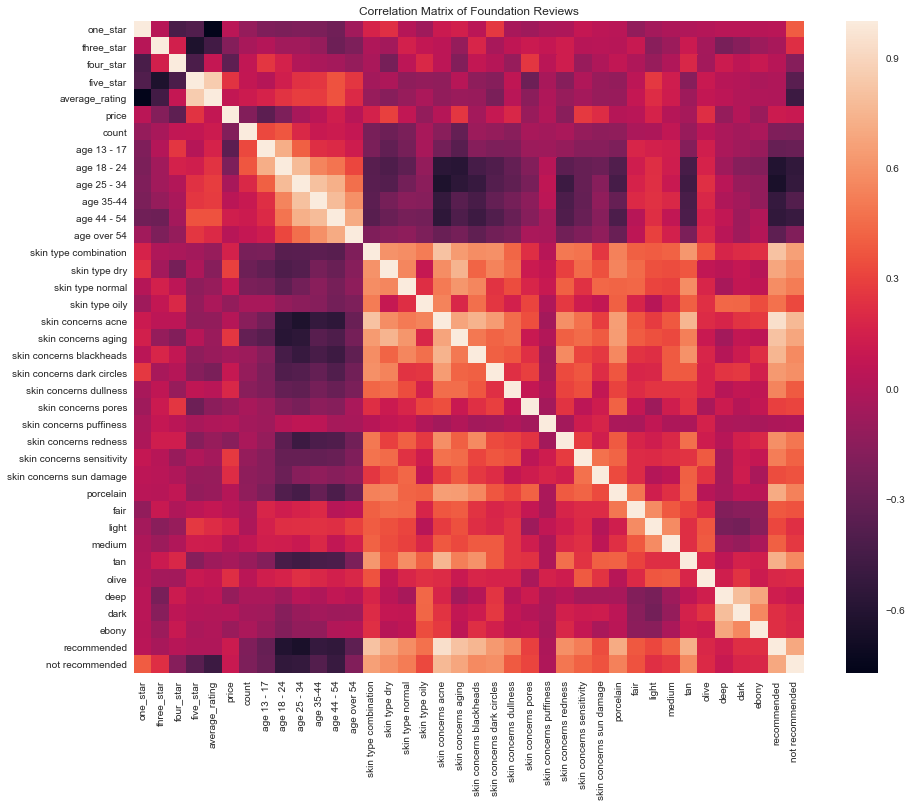

In [65]:
#create correlation matrix
sns.heatmap(corr_df2.corr()).set_title('Correlation Matrix of Foundation Reviews')
sns.set(rc={'figure.figsize':(15,12)})


From the correlation matrix above, we can see that there are some features of reviews that correlate with one another. For example, aging skin concerns trend positively with dry and normal skin types but have almost no correlation with oily skin types. The reason for this can be explained by the fact that oily skin ages better than dry skin. Another example of this that we can see is how the different skin tones trend with aging skin concerns. We see a stronger positive correlation among skin tones between porcelain and tan and aging skin concerns than we do with skin tones between deep and ebony. Again, this can be somewhat explained by the fact that darker skin tones tend to age a bit slower than lighter skin tones do.

We can also see that most people of any age group do not give recommendations (negative or positive) for products, which is seen by the light correlations between age groups and the no recommendation row in the correlation matrix.

One of the odd things about this correlation matrix is that while we see a negative relationship between five star reviews and not recommending a product (positive correlation with one star reviews and not recommending a product), we do not see the opposite effects with recommending a product. In fact, all of the star ratings have negative correlations with recommending a product, which suggests that recommending a product is less common among five-star reviewers than just not having an opinion on recommendations at all.